In [199]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io as sio

In [51]:
IMG_SIZE = 28*28
images = sio.loadmat('hw7_data/mnist_data/images.mat', mat_dtype=True)['images']
flattened_images = np.reshape(images, (IMG_SIZE, 60000)).T

In [202]:
def fit_cluster(x, means, original_cluster):
    best_cluster, min_cost = original_cluster, np.linalg.norm(x - means[original_cluster])**2
    for i, mu in enumerate(means):
        cost = np.linalg.norm(x - mu) ** 2
        if cost < min_cost:
            best_cluster, min_cost = i, cost
    return best_cluster
    
def k_means(k, images, max_iterations=100, min_change=0):
    images = np.reshape(images, (IMG_SIZE, images.shape[2])).T
    
    # random partition
    order = np.arange(images.shape[0])
    np.random.shuffle(order)
    
    clusters = []
    for i in range(k):
        start, end = len(images) * i // k, len(images) * (i+1) // k
        clusters.append(order[start: end])
        
    i, diffs = 0, float('inf')
    while i < max_iterations and diffs > min_change:
        print 'Iteration {} starting: diffs {}'.format(i, diffs)
        diffs = 0
        # phase 1
        means = []
        for c_indices in clusters:
            cluster = np.take(images, c_indices, axis=0)
            means.append(np.mean(cluster, axis=0))
            
        # phase 2
        new_clusters = []
        for _ in range(k):
            new_clusters.append([])
            
        for cidx, c_indices in enumerate(clusters):
            cluster = np.take(images, c_indices, axis=0)
            for img_idx, img in zip(c_indices, cluster):
                new_cluster_idx = fit_cluster(img, means, cidx)
                new_clusters[new_cluster_idx].append(img_idx)
                if new_cluster_idx != cidx:
                    diffs += 1
                    
        clusters = new_clusters
        i += 1
    return means

Iteration 0 starting: diffs inf
Iteration 1 starting: diffs 47193
Iteration 2 starting: diffs 17257
Iteration 3 starting: diffs 9066
Iteration 4 starting: diffs 6044
Iteration 5 starting: diffs 4458
Iteration 6 starting: diffs 3605
Iteration 7 starting: diffs 3111
Iteration 8 starting: diffs 2750
Iteration 9 starting: diffs 2456
Iteration 10 starting: diffs 2204
Iteration 11 starting: diffs 1777
Iteration 12 starting: diffs 1526
Iteration 13 starting: diffs 1408
Iteration 14 starting: diffs 1259
Iteration 15 starting: diffs 1009
Iteration 16 starting: diffs 737
Iteration 17 starting: diffs 491
Iteration 18 starting: diffs 292
Iteration 19 starting: diffs 215
Iteration 20 starting: diffs 138
Iteration 21 starting: diffs 94
Iteration 22 starting: diffs 59
Iteration 23 starting: diffs 26
Iteration 24 starting: diffs 26
Iteration 25 starting: diffs 16
Iteration 26 starting: diffs 6
Iteration 27 starting: diffs 6
Iteration 28 starting: diffs 8
Iteration 29 starting: diffs 5
Iteration 30 sta

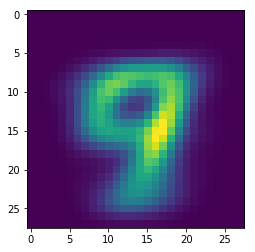

In [206]:
centers = k_means(5, images, 300)
for i, c in enumerate(centers):
    plt.imshow(np.reshape(c, (28, 28)))
    plt.savefig('5center{}.png'.format(i))

Iteration 0 starting: diffs inf
Iteration 1 starting: diffs 53183
Iteration 2 starting: diffs 20018
Iteration 3 starting: diffs 10175
Iteration 4 starting: diffs 6464
Iteration 5 starting: diffs 4182
Iteration 6 starting: diffs 2848
Iteration 7 starting: diffs 2114
Iteration 8 starting: diffs 1706
Iteration 9 starting: diffs 1478
Iteration 10 starting: diffs 1228
Iteration 11 starting: diffs 1084
Iteration 12 starting: diffs 937
Iteration 13 starting: diffs 813
Iteration 14 starting: diffs 754
Iteration 15 starting: diffs 653
Iteration 16 starting: diffs 538
Iteration 17 starting: diffs 530
Iteration 18 starting: diffs 512
Iteration 19 starting: diffs 479
Iteration 20 starting: diffs 486
Iteration 21 starting: diffs 556
Iteration 22 starting: diffs 637
Iteration 23 starting: diffs 727
Iteration 24 starting: diffs 810
Iteration 25 starting: diffs 981
Iteration 26 starting: diffs 1076
Iteration 27 starting: diffs 1143
Iteration 28 starting: diffs 1104
Iteration 29 starting: diffs 1022
It

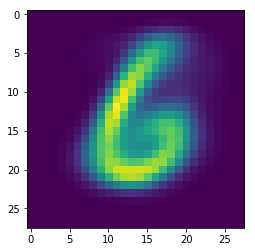

In [205]:
cluster_centers = k_means(10, images, 300)
for i, c in enumerate(cluster_centers):
    plt.imshow(np.reshape(c, (28, 28)))
    plt.savefig('10mnist_center{}.png'.format(i))

Iteration 0 starting: diffs inf
Iteration 1 starting: diffs 56322
Iteration 2 starting: diffs 23201
Iteration 3 starting: diffs 12618
Iteration 4 starting: diffs 8736
Iteration 5 starting: diffs 6568
Iteration 6 starting: diffs 5196
Iteration 7 starting: diffs 4059
Iteration 8 starting: diffs 3297
Iteration 9 starting: diffs 2702
Iteration 10 starting: diffs 2161
Iteration 11 starting: diffs 1604
Iteration 12 starting: diffs 1228
Iteration 13 starting: diffs 920
Iteration 14 starting: diffs 756
Iteration 15 starting: diffs 583
Iteration 16 starting: diffs 477
Iteration 17 starting: diffs 379
Iteration 18 starting: diffs 318
Iteration 19 starting: diffs 299
Iteration 20 starting: diffs 273
Iteration 21 starting: diffs 241
Iteration 22 starting: diffs 211
Iteration 23 starting: diffs 206
Iteration 24 starting: diffs 227
Iteration 25 starting: diffs 213
Iteration 26 starting: diffs 188
Iteration 27 starting: diffs 188
Iteration 28 starting: diffs 186
Iteration 29 starting: diffs 185
Itera

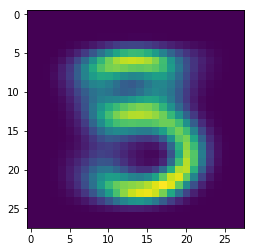

In [207]:
centers = k_means(20, images, 300)
for i, c in enumerate(centers):
    plt.imshow(np.reshape(c, (28, 28)))
    plt.savefig('20center{}.png'.format(i))